앙상블

Contents
<div id="toc"></div>

# 1. 앙상블 (Ensenbles)

**결정트리의 최대단점!!**  
<span class="mark">과적합</span>(overfitting)이 너무 잘 일어난다.

$\rightarrow$ 여러 개의 약한 분류기(Classifier)를 생성하고, 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

1. Voting : DT, KNN, LR, SVM, ... 등 여러 알고리즘 사용
2. Bagging : 데이터를 쪼게 ? 동일한 알고리즘에 파라미터를 다르게?
3. Boosting : 오답노트 -> 오답에 대해 가중치 부여하는 방법으로 모델 수정

# 2. Voting

- 서로 다른 ML 알고리즘으로 여러 개의 분류기를 생성하고, 투표(Vote)를 통해 최종 예측 결과를 결정하는 방식
<img src="img/ch1_5.png" width="40%">  
※ 사이킷런에서는 **VotingClassifier** 클래스로 제공됨

## 2.1. Soft Voting

- 모든 분류기마다 레이블 값에 대한 확률 구함. 레이블 마다 평균 확률을 구한 뒤 확률이 가장 높은 레이블 채택\
<img src="img/ch1_7.png" width="50%">  

## 2.2. Hard

- 다수의 분류기가 예측한 결과값을 최종 결과로 선정
<img src="img/ch1_6.png" width="50%">  

# 3. Bagging

<img src="img/ch1_1.png" width="60%">

여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
- 분류기는 모두 같은 유형의 알고리즘 기반
- 각각의 분류기는 서로 다른 데이터로 학습(부트스트랩)
- 가장 대표적인 것은 RandomForest 알고리즘

1. 데이터셋을 여러 개 만들어서(Bootstrapping)
    - N개의 데이터 중에 N개의 데이터를 중복 허용하여 추출함. (중복을 허용하므로 서로 다른 데이터 셋이 만들어짐)
2. 각 데이터 셋으로 결정트로 알고리즘을 수행
    - 서로 다른 형태의 결정트리가 생성되도록 해야함 $\rightarrow$ 트리를 확장(split)할 때, 일부의 feature만 고려하도록 하여 랜덤성을 부여함
    - 모델들은 서로 독립임, 병렬처리가 가능해짐
3. 만들어진 여러 결정트리의 결과를 합하여 예측
    - Categorical Data는 투표 방식(Votinig)으로 결과를 집계하며, Continuous Data는 평균으로 집계

<img src="img/ch1_3.png" width="40%">

## 실습

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
# 객체 생성
rf_clf = RandomForestClassifier(n_estimators = 100)

# 학습
rf_clf.fit(X_train, y_train)

# 평가
print('학습데이터 정확도 :', rf_clf.score(X_train, y_train))
print('테스트데이어 정확도 : {:.2f}'.format(rf_clf.score(X_test, y_test)))

학습데이터 정확도 : 1.0
테스트데이어 정확도 : 0.96


In [4]:
from sklearn.model_selection import GridSearchCV

# 객체 생성
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_params = {
    'n_estimators':[100, 300, 500],
    'max_depth':[3, 5, 7],
    'n_jobs':[-1]
}

grid_rf = GridSearchCV(rf_clf, param_grid=rf_params, cv=5)

# 학습
grid_rf.fit(X_train, y_train)

# 평가
print('학습데이터 정확도 :', grid_rf.score(X_train, y_train))
print('테스트데이어 정확도 : {:.2f}'.format(grid_rf.score(X_test, y_test)))

학습데이터 정확도 : 0.992462311557789
테스트데이어 정확도 : 0.95


In [5]:
grid_rf.best_params_

{'max_depth': 5, 'n_estimators': 300, 'n_jobs': -1}

In [6]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=300, n_jobs=-1)

In [8]:
import pandas as pd

# grid_rf 에서 찾은 최적의 Randomforest 객체의 피처중요도를 bar 그래프로 그려보기
rf_imp = pd.Series(grid_rf.best_estimator_.feature_importances_, index=cancer.feature_names)

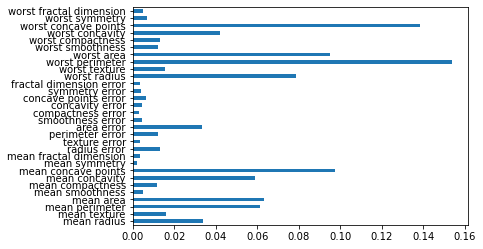

In [9]:
rf_imp.plot(kind = 'barh')

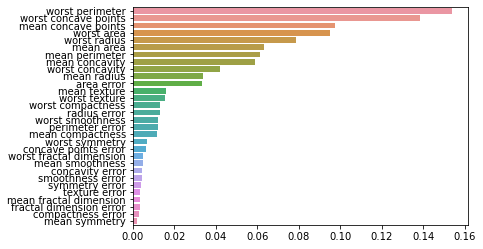

In [10]:
import seaborn as sns
rf_imp.sort_values(ascending=False, inplace=True)
sns.barplot(x=rf_imp, y=rf_imp.index)

# 4. Boosting

<img src="img/ch1_2.png" width="70%">

이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 개선시키는 방식
- 여러 개의 분류기가 순차적으로 학습을 수행
- 이전 분류기에서 예측이 틀렸던 데이터를 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습
- 예측 성능이 뛰어나지만 병렬 처리가 힘들어 학습 속도가 매우 느림

Bagging에서 데이터를 단순히 샘플링해서 각 모델에 적용한다면,  
Boosting은 이전 모델들이 예측하지 못한 Error 데이터에 가중치를 부여하여, 다음 모델이 더 잘 예측하도록 한다.

<img src="img/ch1_4.png" width="30%">

알고리즘 | 특징 | 비고
:---: | :--- | :---
AdaBoost | - 다수결을 통한 정답 분류 및 오답에 가중치 부여 | Scikit-learn에서 제공
GBM | - Loss Function의 gradient를 통해 오답에 가중치 부여 | 
XGBoost |- GBM 대비 성능향상<br>- 시스템 자원 효율적 활용(CPU, Mem)<br>- Kaggle을 통한 성능 검증(많은 상위 랭커가 사용) | Sciki-learn에서 제공X<br>별도의 라이브러리 설치<br>최근 가장 많이 활용되는 boosting 방법들
Light GBM | - XGBoost 대비 성능향상 및 자원소모 최소화<br>- XGBoost가 처리하지 못하는 대용량 데이터 학습 가능<br>- Approximates the split(근사치의 분할)을 통한 성능 향상

||Random Forest (Bagging) | GBM (Boosting)
:---: | :--- | :---
장점 | - 모델 성능이 뛰어남.<br>- 파라미터 최적화를 많이 하지 않아도 훌륭한 성능을 보장<br>- 병렬 처리 <br>- 데이터 스케일을 맞출 필요도 없음 | - 지도 학습에서 가장 강력하고 널리 사용되는 모델 중 하나<br>- 데이터 스케일을 맞출 필요도 없음<br>- 파라미터 최적화 시, 매우 훌륭한 성능
단점 | - 메모리 사용량이 많음. | - 파라미터 최적화가 필수. (미 최적화 시, 성능 보장 X)<br>- 학습 시간이 김.<br>- 병렬 처리가 어려움

## GBM

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
gb_clf = GradientBoostingClassifier()
gb_params = {
    'n_estimators':[100, 300],
    'learning_rate':[0.05, 0.1],
    'max_depth':[3, 5]
}

grib_gb = GridSearchCV(gb_clf, param_grid = gb_params, cv =5)
grib_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 300]})

In [13]:
grib_gb.score(X_test, y_test)

0.9532163742690059

In [14]:
grib_gb.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}

In [15]:
grib_gb.best_estimator_.feature_importances_

array([1.97559350e-04, 2.28178564e-02, 2.06018874e-03, 5.85370390e-02,
       1.01715790e-03, 1.64011408e-03, 4.51088210e-03, 2.91064390e-02,
       6.75314810e-04, 1.66563299e-04, 2.87326616e-04, 4.00174060e-03,
       3.38500674e-04, 1.20016124e-02, 1.50928871e-03, 4.82231536e-04,
       2.45929446e-03, 2.21340675e-04, 8.58462105e-06, 1.24586966e-03,
       1.31739131e-01, 3.01955770e-02, 1.50820890e-01, 5.30537383e-02,
       5.94402065e-03, 2.41946616e-04, 6.99572496e-03, 4.75551753e-01,
       1.84650045e-03, 3.25813590e-04])

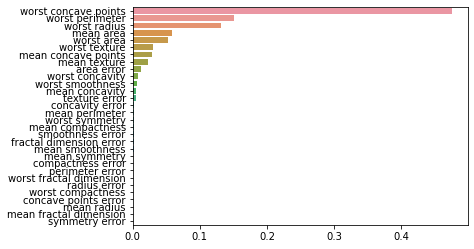

In [16]:
import pandas as pd

gb_imp = pd.Series(grib_gb.best_estimator_.feature_importances_, index=cancer.feature_names)

import seaborn as sns
gb_imp.sort_values(ascending=False, inplace=True)
sns.barplot(x=gb_imp, y=gb_imp.index)

## XGBoost

- 뛰어난 예측 성능
    - 분류와 회귀 영역에서 뛰어난 예측 성능 발휘 
- GBM 대비 빠른 수행 시간  
    - 일반적인 GBM은 순차적으로 weak learne가 가중치를 증감하는 방법으로 학습하기 때문에 병렬 수행이 불가능하여 학습 속도가 느림
    - XGBoost는 병렬 수행 및 다양한 기능으로 빠른 학습 성능 보장.  
      (GBM 대비 빠른 것이지, 결정트리, 랜덤포레스트 등 타 ML 알고리즘에 비해서는 느림)
- 과적합 규제 
    - 일반적인 GBM은 과적합 규제 기능 X
- 나무 가지치기(Tree Pruning)
    - 일반적인 GBM은 분할 시 부정 손실이 발생하면, 분할 수행 X. 
      (부정 손실이란 트리를 분할하면 오히려 엔트로피나 지니지수와 같은 정보 이득이 줄어듬을 의미함.)
    - XGBoost는 max_depth까지 진행한 뒤 loss function 에서의 개선이 일정 threshold에 못미칠 경우까지 역방향으로 pruning과정을 수행.
- 자체 내장된 교차 검증  
    - 반복 수행 시마다 내부적으로 교차검증을 수행
    - 조기 중단 기능 있음. (지정된 반복 횟수가 아니라 교차검증을 통해 최적화되면 반복을 멈춤)
- 결손값 자체 처리
    - 결손값을 자체 처리할 수 있는 기능 

In [18]:
# pip install xgboost
# conda install -c anaconda py-xgboost
import xgboost as xgb

In [19]:
xgb.__version__

'1.1.1'

In [20]:
from xgboost import XGBClassifier

In [21]:
xgb_clf = XGBClassifier()

In [22]:
xgb_clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [24]:
evals = [(X_test, y_test)] # early-stopping을 위한 테스트 데이터셋
xgb_clf.fit(X_train, y_train, early_stopping_rounds=400, eval_set = evals, eval_metric = 'logloss', verbose = True)

[0]	validation_0-logloss:0.49155
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.37137
[2]	validation_0-logloss:0.29486
[3]	validation_0-logloss:0.24182
[4]	validation_0-logloss:0.20135
[5]	validation_0-logloss:0.17230
[6]	validation_0-logloss:0.15296
[7]	validation_0-logloss:0.14182
[8]	validation_0-logloss:0.13281
[9]	validation_0-logloss:0.12558
[10]	validation_0-logloss:0.11739
[11]	validation_0-logloss:0.11263
[12]	validation_0-logloss:0.11155
[13]	validation_0-logloss:0.10390
[14]	validation_0-logloss:0.10519
[15]	validation_0-logloss:0.10294
[16]	validation_0-logloss:0.09801
[17]	validation_0-logloss:0.09824
[18]	validation_0-logloss:0.09678
[19]	validation_0-logloss:0.09812
[20]	validation_0-logloss:0.09827
[21]	validation_0-logloss:0.09751
[22]	validation_0-logloss:0.09856
[23]	validation_0-logloss:0.09589
[24]	validation_0-logloss:0.09619
[25]	validation_0-logloss:0.09595
[26]	validation_0-logloss:0.09448
[27]	validation_0-loglo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
xgb_params = {
    'n_estimators':[100, 300], 
    'max_depth':[3, 5]
}

grid_xgb = GridSearchCV(xgb_clf, param_grid = gb_params, cv =5)

In [29]:
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [34]:
xgb_clf.feature_importances_

array([0.01258363, 0.01292354, 0.01610295, 0.08547176, 0.0023722 ,
       0.0016003 , 0.06026534, 0.01264345, 0.        , 0.00778512,
       0.00774483, 0.        , 0.00730005, 0.00860802, 0.00622838,
       0.00594354, 0.        , 0.00375599, 0.00257929, 0.00254508,
       0.0578267 , 0.00940678, 0.30403915, 0.00861333, 0.01294356,
       0.00250365, 0.00885948, 0.319093  , 0.00305862, 0.01720235],
      dtype=float32)

In [31]:
from xgboost import plot_importance

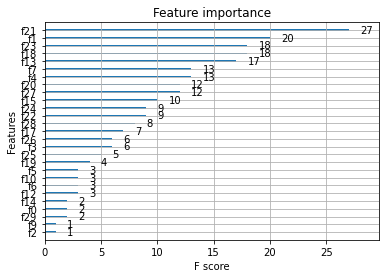

In [39]:
plot_importance(xgb_clf)

**XGBoost의 과적합 개선 팁**   
$\rightarrow$학습 모델을 단순화 하는 방향으로 하이퍼 파라미터 튜닝
- learning_rate 값은 낮춤과 함께 n_estimators는 높여줌.
- max_depth 값을 낮춤
- min_child_weight 값을 높임
- min_split_loss 값을 높임
- sub_sample 값을 줄임
- colsample_bytree 값을 줄임

In [1]:
%%javascript
$.getScript('https://seareale.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>